In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Satellite Field Monitoring/V2/main/model_training/dataset/processed_dataset.csv')

In [3]:
raw_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274
0,0,243.000,350.200,897.400,677.800,3712.600,2422.400,1337.000,252.800,338.800,771.800,723.800,3174.800,2413.800,1458.800,297.000,335.000,624.600,640.800,2484.200,2294.400,1445.000,322.800,384.400,659.400,695.600,2684.400,2261.200,1330.800,396.800,467.600,931.000,973.600,3643.600,2971.200,1847.600,328.400,423.000,979.800,932.600,...,3300.000,3750.800,2974.400,473.200,651.600,1086.800,1623.600,2798.600,3657.800,2846.800,454.000,580.400,947.600,1449.800,2474.000,3494.800,2835.000,448.400,591.000,957.200,1450.400,2459.600,3424.600,2668.400,565.200,683.200,1102.800,1647.200,2786.400,3643.400,2919.400,540.400,599.800,891.600,1279.400,2161.200,3015.400,2568.000,0.385535,0.546250
1,1,171.400,226.600,450.800,360.800,3567.600,1593.600,752.000,156.600,228.600,468.000,392.600,3604.000,1644.200,777.000,180.400,297.200,625.200,556.000,3404.400,1823.600,978.600,166.200,280.400,625.200,551.400,3354.000,1837.800,989.600,292.200,307.000,449.800,370.800,1655.400,689.200,339.200,279.600,304.200,449.600,374.400,...,2125.600,2258.800,1661.200,260.400,411.200,836.200,981.200,2414.800,1987.200,1283.800,240.400,404.200,825.600,975.400,2398.800,1982.400,1244.600,330.800,451.800,774.000,992.800,2407.200,2300.600,1726.000,349.800,455.600,779.600,1026.000,2414.600,2248.400,1739.600,384.000,475.800,790.000,1026.400,2397.200,2234.200,1719.400,0.520737,0.679225
2,2,234.000,298.000,668.000,448.000,3997.000,1864.000,953.000,136.000,221.000,760.000,482.000,4012.000,1854.000,868.000,147.000,237.000,712.000,509.000,3884.000,2141.000,1046.000,338.000,476.000,983.000,783.000,5232.000,2473.000,1376.000,145.000,314.000,803.000,698.000,3928.000,1906.000,1036.000,142.000,266.000,711.000,622.000,...,2093.000,3172.000,2466.000,270.000,487.000,930.000,1337.000,2369.000,3490.000,2904.000,295.000,429.000,799.000,1196.000,2107.000,3188.000,2504.000,314.000,448.000,810.000,1205.000,2113.000,3261.000,2513.000,339.000,466.000,814.000,1222.000,2123.000,3486.000,3022.000,341.000,507.000,921.000,1405.000,2423.000,3613.000,2983.000,0.424557,0.578246
3,3,317.000,317.000,622.000,297.000,4837.000,2005.000,756.000,70.000,94.000,262.000,80.000,1227.000,313.000,130.000,296.000,317.000,593.000,313.000,4426.000,1913.000,725.000,155.000,242.000,604.000,349.000,4865.000,1946.000,754.000,175.000,242.000,605.000,328.000,4416.000,1843.000,749.000,190.000,281.000,596.000,389.000,...,2030.000,1694.000,1108.000,275.000,361.000,619.000,591.000,2428.000,2079.000,1244.000,252.000,345.000,688.000,637.000,2547.000,1951.000,1129.000,319.000,401.000,788.000,666.000,2660.000,2030.000,1221.000,260.000,332.000,602.000,581.000,2315.000,1917.000,1225.000,231.000,317.000,595.000,612.000,2406.000,1808.000,1066.000,0.732383,0.842036
4,4,141.133,203.936,488.792,288.667,2341.268,1015.778,454.481,235.149,335.514,692.324,466.776,2988.322,1282.146,673.536,245.339,342.306,687.650,486.747,2915.337,1343.151,729.761,267.417,354.566,643.169,504.933,3019.913,1418.310,822.335,220.353,301.253,647.750,407.036,2420.288,1111.774,550.426,217.627,287.417,563.922,407.927,...,2203.424,1915.268,1368.359,413.842,555.832,923.291,844.499,2134.723,1757.093,1256.741,502.696,632.541,1067.031,866.781,2141.100,1885.725,1390.051,471.791,583.699,923.587,932.599,2290.434,1912.576,1382.745,409.250,550.954,873.701,879.769,2150.158,1908.286,1226.434,399.925,521.716,851.474,788.311,1905.576,1387.545,861.357,0.571616,0.721583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2942,177.926,248.

In [4]:
X_train = raw_data.drop(['Unnamed: 0','273','274'],axis=1, inplace=False)

In [5]:
X_train = X_train/1000

In [6]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
0,0.243000,0.350200,0.897400,0.677800,3.712600,2.422400,1.337000,0.252800,0.338800,0.771800,0.723800,3.174800,2.413800,1.458800,0.297000,0.335000,0.624600,0.640800,2.484200,2.294400,1.445000,0.322800,0.384400,0.659400,0.695600,2.684400,2.261200,1.330800,0.396800,0.467600,0.931000,0.973600,3.643600,2.971200,1.847600,0.328400,0.423000,0.979800,0.932600,3.265000,...,1.467200,1.876800,3.300000,3.750800,2.974400,0.473200,0.651600,1.086800,1.623600,2.798600,3.657800,2.846800,0.454000,0.580400,0.947600,1.449800,2.474000,3.494800,2.835000,0.448400,0.591000,0.957200,1.450400,2.459600,3.424600,2.668400,0.565200,0.683200,1.102800,1.647200,2.786400,3.643400,2.919400,0.540400,0.599800,0.891600,1.279400,2.161200,3.015400,2.568000
1,0.171400,0.226600,0.450800,0.360800,3.567600,1.593600,0.752000,0.156600,0.228600,0.468000,0.392600,3.604000,1.644200,0.777000,0.180400,0.297200,0.625200,0.556000,3.404400,1.823600,0.978600,0.166200,0.280400,0.625200,0.551400,3.354000,1.837800,0.989600,0.292200,0.307000,0.449800,0.370800,1.655400,0.689200,0.339200,0.279600,0.304200,0.449600,0.374400,1.623800,...,0.683800,0.856200,2.125600,2.258800,1.661200,0.260400,0.411200,0.836200,0.981200,2.414800,1.987200,1.283800,0.240400,0.404200,0.825600,0.975400,2.398800,1.982400,1.244600,0.330800,0.451800,0.774000,0.992800,2.407200,2.300600,1.726000,0.349800,0.455600,0.779600,1.026000,2.414600,2.248400,1.739600,0.384000,0.475800,0.790000,1.026400,2.397200,2.234200,1.719400
2,0.234000,0.298000,0.668000,0.448000,3.997000,1.864000,0.953000,0.136000,0.221000,0.760000,0.482000,4.012000,1.854000,0.868000,0.147000,0.237000,0.712000,0.509000,3.884000,2.141000,1.046000,0.338000,0.476000,0.983000,0.783000,5.232000,2.473000,1.376000,0.145000,0.314000,0.803000,0.698000,3.928000,1.906000,1.036000,0.142000,0.266000,0.711000,0.622000,3.407000,...,0.809000,1.176000,2.093000,3.172000,2.466000,0.270000,0.487000,0.930000,1.337000,2.369000,3.490000,2.904000,0.295000,0.429000,0.799000,1.196000,2.107000,3.188000,2.504000,0.314000,0.448000,0.810000,1.205000,2.113000,3.261000,2.513000,0.339000,0.466000,0.814000,1.222000,2.123000,3.486000,3.022000,0.341000,0.507000,0.921000,1.405000,2.423000,3.613000,2.983000
3,0.317000,0.317000,0.622000,0.297000,4.837000,2.005000,0.756000,0.070000,0.094000,0.262000,0.080000,1.227000,0.313000,0.130000,0.296000,0.317000,0.593000,0.313000,4.426000,1.913000,0.725000,0.155000,0.242000,0.604000,0.349000,4.865000,1.946000,0.754000,0.175000,0.242000,0.605000,0.328000,4.416000,1.843000,0.749000,0.190000,0.281000,0.596000,0.389000,4.365000,...,0.511000,0.493000,2.030000,1.694000,1.108000,0.275000,0.361000,0.619000,0.591000,2.428000,2.079000,1.244000,0.252000,0.345000,0.688000,0.637000,2.547000,1.951000,1.129000,0.319000,0.401000,0.788000,0.666000,2.660000,2.030000,1.221000,0.260000,0.332000,0.602000,0.581000,2.315000,1.917000,1.225000,0.231000,0.317000,0.595000,0.612000,2.406000,1.808000,1.066000
4,0.141133,0.203936,0.488792,0.288667,2.341268,1.015778,0.454481,0.235149,0.335514,0.692324,0.466776,2.988322,1.282146,0.673536,0.245339,0.342306,0.687650,0.486747,2.915337,1.343151,0.729761,0.267417,0.354566,0.643169,0.504933,3.019913,1.418310,0.822335,0.220353,0.301253,0.647750,0.407036,2.420288,1.111774,0.550426,0.217627,0.287417,0.563922,0.407927,2.289004,...,0.886913,0.858791,2.203424,1.915268,1.368359,0.413842,0.555832,0.923291,0.844499,2.134723,1.757093,1.256741,0.502696,0.632541,1.067031,0.866781,2.141100,1.885725,1.390051,0.471791,0.583699,0.923587,0.932599,2.290434,1.912576,1.382745,0.409250,0.550954,0.873701,0.879769,2.150158,1.908286,1.226434,0.399925,0.521716,0.851474,0.788311,1.905576,1.387545,0.861357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [7]:
X_train.shape

(2947, 273)

In [8]:
X_train = np.array(X_train)

In [9]:
X_train

array([[ 0.243   ,  0.3502  ,  0.8974  , ...,  2.1612  ,  3.0154  ,
         2.568   ],
       [ 0.1714  ,  0.2266  ,  0.4508  , ...,  2.3972  ,  2.2342  ,
         1.7194  ],
       [ 0.234   ,  0.298   ,  0.668   , ...,  2.423   ,  3.613   ,
         2.983   ],
       ...,
       [ 0.1705  ,  0.239278,  0.545611, ...,  2.459417,  1.41475 ,
         0.749278],
       [-0.342865, -0.193589,  0.110459, ...,  2.564505,  1.832065,
         1.24022 ],
       [-0.356838, -0.226406,  0.091693, ...,  2.096203,  1.45484 ,
         0.886865]])

In [10]:
X_train.shape

(2947, 273)

In [11]:
X_data = X_train.copy()

In [12]:
del X_train

In [13]:
X_data.shape

(2947, 273)

In [14]:
X_train,X_test = train_test_split(X_data, test_size=0.2, random_state=67)

In [15]:
X_train.shape

(2357, 273)

In [16]:
X_test.shape

(590, 273)

# Configuration 1 : Without any activation

In [18]:
input_size = 273


x = Input(shape=(input_size,))
hidden_1 = Dense(150)(x)
hidden_2 = Dense(50)(hidden_1)

h = Dense(10,name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50)(h)
hidden_4 = Dense(150)(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 273)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               41100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_8 (Dense)              (None, 150)               7650      
_________________________________________________________________
dense_9 (Dense)              (None, 273)               4122

# Configuration 2 : With ReLU Activation

In [19]:
input_size = 273


x = Input(shape=(input_size,))
hidden_1 = Dense(150,activation = 'relu')(x)
hidden_2 = Dense(50,activation = 'relu')(hidden_1)

h = Dense(10,activation = 'relu',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'relu')(h)
hidden_4 = Dense(150,activation = 'relu')(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 273)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               41100     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_13 (Dense)             (None, 150)               7650      
_________________________________________________________________
dense_14 (Dense)             (None, 273)               4122

# Configuration 3 : With SELU Activation

In [23]:
input_size = 273


x = Input(shape=(input_size,))
hidden_1 = Dense(150,activation = 'selu')(x)
hidden_2 = Dense(50,activation = 'selu')(hidden_1)

h = Dense(10,activation = 'selu',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'selu')(h)
hidden_4 = Dense(150,activation = 'selu')(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 273)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 150)               41100     
_________________________________________________________________
dense_31 (Dense)             (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_33 (Dense)             (None, 150)               7650      
_________________________________________________________________
dense_34 (Dense)             (None, 273)               4122

# Configuration 4: TanH Activation

In [21]:
input_size = 273


x = Input(shape=(input_size,))
hidden_1 = Dense(150,activation = 'tanh')(x)
hidden_2 = Dense(50,activation = 'tanh')(hidden_1)

h = Dense(10,activation = 'tanh',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'tanh')(h)
hidden_4 = Dense(150,activation = 'tanh')(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 273)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 150)               41100     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_22 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_23 (Dense)             (None, 150)               7650      
_________________________________________________________________
dense_24 (Dense)             (None, 273)               4122

## SeLU activation is found out to be best

# Trying out different regularization methods !

# Configuration 5: Selu + Dropout regularization

In [25]:
input_size = 273


x = Input(shape=(input_size,))
#x = Dropout(0.3)(x)

hidden_1 = Dense(150,activation = 'selu')(x)
hidden_1 = Dropout(0.3)(hidden_1)

hidden_2 = Dense(50,activation = 'selu')(hidden_1)
hidden_2 = Dropout(0.3)(hidden_2)

h = Dense(10,activation = 'selu',name = 'Feature_latent')(hidden_2)
h = Dropout(0.3)(h)

hidden_3 = Dense(50,activation = 'selu')(h)
hidden_3 =  Dropout(0.3)(hidden_3)

hidden_4 = Dense(150,activation = 'selu')(hidden_3)
hidden_4 = Dropout(0.3)(hidden_4)

r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 273)]             0         
_________________________________________________________________
dense_40 (Dense)             (None, 150)               41100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 50)                7550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0   

# Configuration 5: Selu + L2 regularization

In [29]:
input_size = 273


x = Input(shape=(input_size,))
hidden_1 = Dense(150,activation = 'selu',kernel_regularizer='l2')(x)
hidden_2 = Dense(50,activation = 'selu',kernel_regularizer='l2')(hidden_1)

h = Dense(10,activation = 'selu',kernel_regularizer='l2',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'selu',kernel_regularizer='l2')(h)
hidden_4 = Dense(150,activation = 'selu',kernel_regularizer='l2')(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 273)]             0         
_________________________________________________________________
dense_60 (Dense)             (None, 150)               41100     
_________________________________________________________________
dense_61 (Dense)             (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_62 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_63 (Dense)             (None, 150)               7650      
_________________________________________________________________
dense_64 (Dense)             (None, 273)               412

# With Batchnormalization

In [33]:
from keras.layers import BatchNormalization
input_size = 273


x = Input(shape=(input_size,))

hidden_1 = Dense(150,activation = 'selu')(x)
hidden_1 = BatchNormalization()(hidden_1)

hidden_2 = Dense(50,activation = 'selu')(hidden_1)
hidden_2 = BatchNormalization()(hidden_2)

h = Dense(10,activation = 'selu',name = 'Feature_latent')(hidden_2)
h = BatchNormalization()(h)

hidden_3 = Dense(50,activation = 'selu')(h)
hidden_3 =  BatchNormalization()(hidden_3)

hidden_4 = Dense(150,activation = 'selu')(hidden_3)
hidden_4 = BatchNormalization()(hidden_4)

r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 273)]             0         
_________________________________________________________________
dense_66 (Dense)             (None, 150)               41100     
_________________________________________________________________
batch_normalization (BatchNo (None, 150)               600       
_________________________________________________________________
dense_67 (Dense)             (None, 50)                7550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40 

# Best Configuration found
# - Activation - SeLU
# - Regularization - None

In [34]:
input_size = 273


x = Input(shape=(input_size,))
hidden_1 = Dense(200,activation = 'selu')(x)

hidden_1 = Dense(150,activation = 'selu')(hidden_1)
hidden_2 = Dense(50,activation = 'selu')(hidden_1)

h = Dense(10,activation = 'selu',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'selu')(h)
hidden_4 = Dense(150,activation = 'selu')(hidden_3)

hidden_4 = Dense(200,activation = 'selu')(hidden_4)

r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 273)]             0         
_________________________________________________________________
dense_71 (Dense)             (None, 200)               54800     
_________________________________________________________________
dense_72 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_73 (Dense)             (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_74 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_75 (Dense)             (None, 150)               765

# Final Training

In [42]:
input_size = 273
from keras.optimizers import Adam
from keras import callbacks
import os


x = Input(shape=(input_size,))
hidden_1 = Dense(150,activation = 'selu')(x)
hidden_2 = Dense(50,activation = 'selu')(hidden_1)

h = Dense(10,activation = 'selu',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'selu')(h)
hidden_4 = Dense(150,activation = 'selu')(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
opt1 = Adam(learning_rate=0.0003)

autoencoder.compile(optimizer=opt1, loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 50
batch_size = 32
models_dir = 'models'

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test),
                          callbacks= [callbacks.ModelCheckpoint(os.path.join(models_dir, 'epoch_{epoch:02d}_acc_{val_loss:.4f}.h5'),monitor='val_loss', save_weights_only=True, save_best_only=True) ]

)

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 273)]             0         
_________________________________________________________________
dense_108 (Dense)            (None, 150)               41100     
_________________________________________________________________
dense_109 (Dense)            (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_110 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_111 (Dense)            (None, 150)               7650      
_________________________________________________________________
dense_112 (Dense)            (None, 273)               412

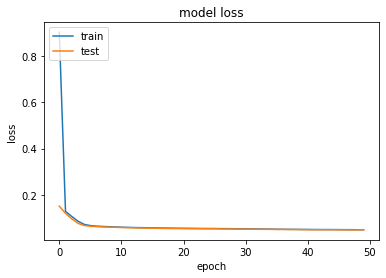

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Finetunning

In [48]:
input_size = 273
from keras.optimizers import Adam
from keras import callbacks
import os


x = Input(shape=(input_size,))
hidden_1 = Dense(150,activation = 'selu')(x)
hidden_2 = Dense(50,activation = 'selu')(hidden_1)

h = Dense(10,activation = 'selu',name = 'Feature_latent')(hidden_2)

hidden_3 = Dense(50,activation = 'selu')(h)
hidden_4 = Dense(150,activation = 'selu')(hidden_3)
r = Dense(input_size)(hidden_4)

autoencoder = Model(inputs=x, outputs=r)
opt1 = Adam(learning_rate=0.0001)

autoencoder.compile(optimizer=opt1, loss='mse')

print(autoencoder.summary())

# Relu results
epochs = 300
batch_size = 32
models_dir = 'models2'

model = autoencoder.load_weights('/content/models/epoch_48_acc_0.0491.h5')

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test),
                          callbacks= [callbacks.ModelCheckpoint(os.path.join(models_dir, 'epoch_{epoch:02d}_acc_{val_loss:.4f}.h5'),monitor='val_loss', save_weights_only=True, save_best_only=True) ]

)

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 273)]             0         
_________________________________________________________________
dense_133 (Dense)            (None, 150)               41100     
_________________________________________________________________
dense_134 (Dense)            (None, 50)                7550      
_________________________________________________________________
Feature_latent (Dense)       (None, 10)                510       
_________________________________________________________________
dense_135 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_136 (Dense)            (None, 150)               7650      
_________________________________________________________________
dense_137 (Dense)            (None, 273)               412

In [49]:
autoencoder.save('/content/drive/MyDrive/Satellite Field Monitoring/V2/main/model_training/models/model_v1.h5')
autoencoder.save_weights('/content/drive/MyDrive/Satellite Field Monitoring/V2/main/model_training/models/model_weights_v1.h5')

# Final Loss
Epoch 300/300
74/74 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.0429

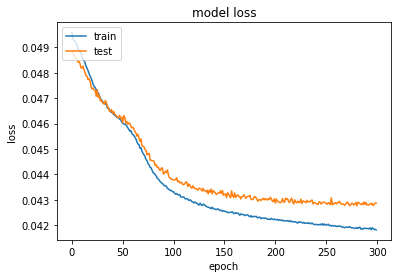

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()